In [1]:
import cv2
import dlib
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request

from sklearn import metrics
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from tqdm import tqdm, tqdm_pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import re
import gdown
import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import tensorflow as tf

warnings.filterwarnings("ignore")

def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d', '', sms)
    sms = re.sub('_\d\d', '', sms)
    sms = re.sub('_\d', '', sms)
    return sms

# Getting the csv data loaded
dataset_url = 'https://drive.google.com/uc?id=1xFiYsULlQWWmi2Ai0fHjtApniP5Pscuf'
dataset_path = './ferdata.csv'
gdown.download(dataset_url, dataset_path, True)

# Getting the Dlib Shape predictor!
dlibshape_url = 'https://drive.google.com/uc?id=17D3D89Gke6i5nKOvmsbPslrGg5rVgOwg'
dlibshape_path = './shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)

# Getting the Xpure loaded
pureX_url = 'https://drive.google.com/uc?id=1CglpXodenZVrkaZehLtfykfQv8dcnfO9'
pureX_path = './pureX.npy'
gdown.download(pureX_url, pureX_path, True)

# Getting the Xdata loaded
dataX_url = 'https://drive.google.com/uc?id=1sIJGxUM6rNBcWxucs6iynDepeKU1Q56p'
dataX_path = './dataX.npy'
gdown.download(dataX_url, dataX_path, True)

# Getting the Ydata loaded
dataY_url = 'https://drive.google.com/uc?id=1Rfr0OP-hZO_UZfuOyMNR2RjNRAro85zE'
dataY_path = './dataY.npy'
gdown.download(dataY_url, dataY_path, True)

print("Data Downloaded!")

def plot_confusion_matrix(y_true, y_predicted):
    cm = metrics.confusion_matrix(y_true, y_predicted)
    print("Plotting the Confusion Matrix")
    labels = list(label_map.values())
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    fig = plt.figure()
    res = sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
    plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], labels, va='center')
    plt.title('Confusion Matrix - TestData')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

def plot_graphs(history, best):
    plt.figure(figsize=[10, 4])
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy across training\n best accuracy of %.02f' % best[1])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss across training\n best loss of %.02f' % best[0])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Integer to Label Mapping
label_map = {0: "ANGRY", 1: "HAPPY", 2: "SAD", 3: "SURPRISE", 4: "NEUTRAL"}

# Load the 68 face Landmark file
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

def get_landmarks(image):
    rects = [dlib.rectangle(left=1, top=1, right=47, bottom=47)]
    landmarks = [(p.x, p.y) for p in predictor(image, rects[0]).parts()]
    return image, landmarks

def image_landmarks(image, face_landmarks):
    radius = -4
    circle_thickness = 1
    image_copy = image.copy()
    for (x, y) in face_landmarks:
        cv2.circle(image_copy, (x, y), circle_thickness, (255, 0, 0), radius)

    plt.imshow(image_copy, interpolation='nearest')
    plt.show()

def landmarks_edist(face_landmarks):
    e_dist = []
    for i in range(len(face_landmarks)):
        for j in range(len(face_landmarks)):
            if i != j:
                e_dist.append(distance.euclidean(face_landmarks[i], face_landmarks[j]))
    return e_dist

def compare_learning(mlp, lm, cnn, vgg):
    plt.plot(vgg.history['val_accuracy'])
    plt.plot(cnn.history['val_accuracy'])
    plt.plot(mlp.history['val_accuracy'])
    plt.plot(lm.history['val_accuracy'])
    plt.ylabel('validation accuracy')
    plt.xlabel('epoch')
    plt.legend(['cnn_transfer', 'cnn_scratch', 'mlp_pixels', 'mlp_landmarks'], bbox_to_anchor=[1, 1])
    plt.xticks(range(0, epochs + 1, 5), range(0, epochs + 1, 5))
    plt.show()


<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
/var/folders/61/fmmdx5z91s9_81y4wxnb3bdm0000gn/T/ipykernel_1007/3432323194.py:40: SyntaxWarning: invalid escape sequence '\d'
  sms = re.sub('_\d\d\d', '', sms)
/var/folders/61/fmmdx5z91s9_81y4wxnb3bdm0000gn/T/ipykernel_1007/3432323194.py:41: SyntaxWarning: invalid escape sequence '\d'
  sms = re.sub('_\d\d', '', sms)
/var/folders/61/fmmdx5z91s9_81y4wxnb3bdm0000gn/T/ipykernel_1007/3432323194.py:42: SyntaxWarning: invalid escape sequence '\d'
  sms = re.sub('_\d', '', sms)


Data Downloaded!


In [2]:
# training related  
epochs, batch_size = 20, 64
# testing related
test_ratio = .1
# categories to predict 
n_emotion_labels = 5 
# shape of images 
width, height = 48, 48

In [3]:
# load data 
dataX_pixels = np.load('pureX.npy')
dataY_pixels = np.load('dataY.npy')

In [4]:
# we'll use the same epochs and batch size as above
# convert labels to one hot encoding
y_onehot = keras.utils.to_categorical(dataY_pixels, len(set(dataY_pixels)))

In [5]:
# split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(dataX_pixels, y_onehot, test_size=test_ratio, random_state=42)

In [6]:
pixel_scaler = StandardScaler()
pixel_scaler.fit(X_train)
X_train = pixel_scaler.transform(X_train)
X_test = pixel_scaler.transform(X_test)

In [7]:
# pixels were vectors
print(X_train.shape) 

(18000, 2304)


In [8]:
X_train_cnn = X_train.reshape(len(X_train), height, width)
X_test_cnn = X_test.reshape(len(X_test), height, width)
print(X_train_cnn.shape)

(18000, 48, 48)


In [9]:
X_train_cnn = np.expand_dims(X_train_cnn, 3)
X_test_cnn = np.expand_dims(X_test_cnn, 3)
print(X_train_cnn.shape)

(18000, 48, 48, 1)


In [10]:
n_labels = len(label_map)  # Define the number of labels correctly

cnn_model = Sequential() # initialize model
# this conv layer has 64 filters! the input shape needs to be the same dimensions of the image
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1)))
# batch normalization 
cnn_model.add(BatchNormalization())
# max pooling
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# dropout
cnn_model.add(Dropout(0.5))
# flatten all the outputs between convolutional and dense layers
cnn_model.add(Flatten())
# add a "dense layer" (i.e. the fully connected layers in MLPs) with dropout
cnn_model.add(Dense(512, activation='relu'))
# output layer
cnn_model.add(Dense(n_labels, activation='softmax'))

In [11]:
from keras.regularizers import l2
cnn_model = Sequential()

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), kernel_regularizer=l2(0.01)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(n_labels, activation='softmax'))

In [12]:
#Saves the Best Model Based on Val Loss
checkpoint = ModelCheckpoint('best_cnn_model.keras', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
# compliling the model with adam optimixer and categorical crossentropy loss
cnn_model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

# training the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                            callbacks=[checkpoint], validation_data=(X_test_cnn, y_test), shuffle=True)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.2115 - loss: 2.2381
Epoch 1: val_loss improved from inf to 1.62035, saving model to best_cnn_model.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 152s 531ms/step - accuracy: 0.2115 - loss: 2.2367 - val_accuracy: 0.2120 - val_loss: 1.6203
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.2443 - loss: 1.6256
Epoch 2: val_loss did not improve from 1.62035
282/282 ━━━━━━━━━━━━━━━━━━━━ 154s 547ms/step - accuracy: 0.2443 - loss: 1.6255 - val_accuracy: 0.2145 - val_loss: 1.6238
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.2808 - loss: 1.5673
Epoch 3: val_loss improved from 1.62035 to 1.46272, saving model to best_cnn_model.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 157s 558ms/step - accuracy: 0.2809 - loss: 1.5672 - val_accuracy: 0.3090 - val_loss: 1.4627
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.3324 - loss: 1.4699
Epoch 4: val_loss improved from 1.46272 to 1.38772, saving model

In [13]:
cnn_performance = cnn_model.evaluate(X_test_cnn, y_test, batch_size=64)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6606 - loss: 0.8916


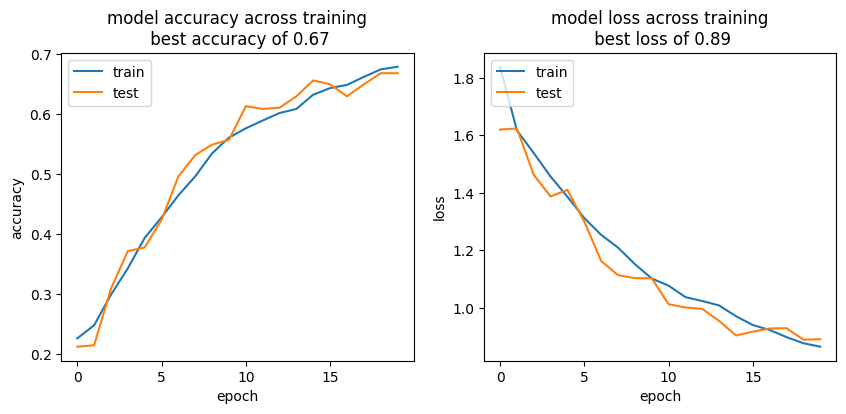

In [14]:
plot_graphs(cnn_history, cnn_performance)